In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

3.3.2 (v3.3.2:d047928ae3f6, May 13 2013, 13:52:24) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
1.9.2
0.16.2


Alright in this section we're going to continue with the running data set but we're going to dive a bit deeper into ways of analyzing the data including filtering, dropping rows, doing some groupings and that sort of thing.

So what we'll do is read in our csv file.

In [7]:
pd.read_csv?

In [8]:
list(range(1,7))

[1, 2, 3, 4, 5, 6]

In [13]:
df = pd.read_csv('../data/date_fixed_running_data_with_time.csv', parse_dates=['Date'], usecols=list(range(0,6)))

In [14]:
df.dtypes

Date            datetime64[ns]
Miles                  float64
Time                    object
Seconds                float64
Minutes                float64
Min_per_mile           float64
dtype: object

In [15]:
df.sort(inplace=True)
df.head()

,Date,Miles,Time,Seconds,Minutes,Min_per_mile
0,2014-08-02,1.70,NaN,NaN,NaN,NaN
1,2014-08-03,1.40,NaN,NaN,NaN,NaN
2,2014-08-04,2.10,NaN,NaN,NaN,NaN
3,2014-08-05,0.00,NaN,NaN,NaN,NaN
4,2014-08-06,2.38,NaN,NaN,NaN,NaN


Now let's about getting some summary statistics. I would encourage you to try these on your own. We've learned pretty much everything we need to in order to be able to do these on without guidance and as always if you need clarification just ask on the side.

What was the longest run in miles and minutes that I ran?

In [16]:
df.Minutes.max()

260.71666666666664

In [17]:
df.Miles.max()

26.199999999999999

What about the shortest in miles and minutes that I ran?

In [18]:
df.Minutes.min()

6.2666666666666675

In [19]:
df.Miles.min()

0.0

We forgot to ignore our null values, so how would we do it by ignoring those?

In [20]:
df.Miles[df.Miles > 0].min()

0.65000000000000002

What was the most common running distance I did excluding times when I didn't run at all.

In [21]:
df.Miles[df.Miles > 0].value_counts().index[0]

1.3700000000000001

Plot a graph of the cumulative running distance in this dataset.

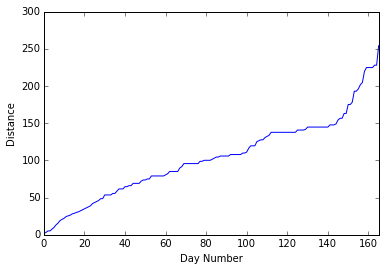

In [22]:
df.Miles.cumsum().plot()
plt.xlabel("Day Number")
plt.ylabel("Distance")

Plot a graph of the cumulative running hours in this data set.

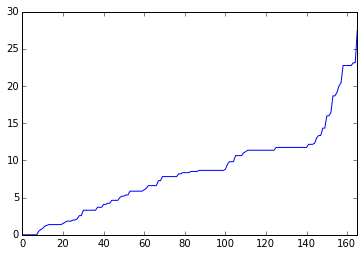

In [23]:
(df.Minutes.fillna(0).cumsum() / 60).plot()

Another interesting question we could ask is what days of the week do I commonly go for runs. Am I faster on certain days or does my speed improve over time relative to the distance that I'm running.

So let's get our days of the week

In [24]:
df.Date[0].strftime("%A")

'Saturday'

We will do that by mapping our date column to a the time format we need

In [25]:
df.Date.map(lambda x: x.strftime("%A")).head()

0     Saturday
1       Sunday
2       Monday
3      Tuesday
4    Wednesday
Name: Date, dtype: object

then we just set that to a new column.

In [26]:
df['Day_of_week'] = df.Date.map(lambda x: x.strftime("%A"))

In [27]:
df.head(10)

,Date,Miles,Time,Seconds,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,NaN,NaN,Wednesday
5,2014-08-07,2.30,NaN,NaN,NaN,NaN,Thursday
6,2014-08-08,3.40,NaN,NaN,NaN,NaN,Friday
7,2014-08-09,2.50,NaN,NaN,NaN,NaN,Saturday
8,2014-08-10,3.36,0:28:37,1717,28.616667,8.516865,Sunday
9,2014-08-11,1.67,0:13:07,787,13.116667,7.854291,Monday


and we can make a bar plot of it, but let's see if we can distinguish anything unique about certain days of the week.

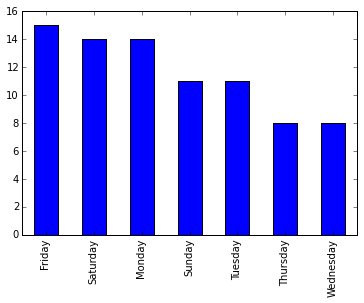

In [28]:
df[df.Miles > 0].Day_of_week.value_counts().plot(kind='bar')

We will do that by creating groups of data frames

We can see that in this sample I run a lot more on the Friday Saturday and Monday. Some interesting patterns. Why don't we try looking at the means and that sort of thing.

But before we get there, at this point, our data frame is getting pretty messy and I think it's worth explaining how to remove columns and add remove rows and columns.

First let's remove the Time column - seeing as we already have minutes and  seconds

In [29]:
del(df['Time'])


del will delete it in place

In [30]:
df.head()

,Date,Miles,Seconds,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,NaN,Wednesday


Finally we can use drop to drop a column. Now we have to specify the axis( we can also use this to drop rows), now this does not happen in place.

In [31]:
df.drop('Seconds',axis=1)

,Date,Miles,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,Wednesday
5,2014-08-07,2.30,NaN,NaN,Thursday
6,2014-08-08,3.40,NaN,NaN,Friday
7,2014-08-09,2.50,NaN,NaN,Saturday
8,2014-08-10,3.36,28.616667,8.516865,Sunday
9,2014-08-11,1.67,13.116667,7.854291,Monday


we can also use drop to drop a specific row by specifying the 0 axis

In [32]:
tempdf = pd.DataFrame(np.arange(4).reshape(2,2))
tempdf

,0,1
0,0,1
1,2,3


In [33]:
tempdf.drop(1,axis=0)

,0,1
0,0,1


we Already saw how to create a new column, we can also create a new row using the append method. This takes in a data frame or Series and appends it to the end of the data frame.

In [34]:
tempdf.append(pd.Series([4,5]), ignore_index=True)

,0,1
0,0,1
1,2,3
2,4,5


In [35]:
df.head()

,Date,Miles,Seconds,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,NaN,Wednesday


We can also pop out a column which will remove it from a data frame and return the Series. You'll see that it happens in place.

In [36]:
df.pop('Seconds')

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8       1717
9        787
10       635
11      1045
12       376
13       376
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       573
21       564
22       545
23       NaN
24       NaN
25       535
26       NaN
27       630
28      1500
29       NaN
       ...  
136      NaN
137      NaN
138      NaN
139      NaN
140      NaN
141     1500
142      NaN
143      NaN
144      555
145     2616
146     1139
147      NaN
148     3523
149      NaN
150     5940
151      NaN
152     1575
153     8100
154      NaN
155     1680
156     3110
157     1508
158     8400
159      NaN
160      NaN
161      NaN
162      NaN
163     1330
164      NaN
165    15643
Name: Seconds, dtype: float64

In [37]:
df.head()

,Date,Miles,Minutes,Min_per_mile,Day_of_week
0,2014-08-02,1.70,NaN,NaN,Saturday
1,2014-08-03,1.40,NaN,NaN,Sunday
2,2014-08-04,2.10,NaN,NaN,Monday
3,2014-08-05,0.00,NaN,NaN,Tuesday
4,2014-08-06,2.38,NaN,NaN,Wednesday


Now we've made our dataset a bit more manageable. We've kind of just got the basics of what we need to perform some groupwise analysis.

Now at this point we're going to do some groupings. This is an extremely powerful part of pandas and one that you'll use all the time.

pandas follows the the Split-Apply-Combine style of data analysis.

Many data analysis problems involve the application of a split-apply-combine strategy, where you break up a big problem into manageable pieces, operate on each piece independently and then put all the pieces back together. 

Hadley Wickhan from Rice University:
http://www.jstatsoft.org/v40/i01/paper


Since we're going to want to check things in groups. What I'm going to do is try to analyze each day of the week to see if there are any differences in the types of running that I do on those days.

we'll start by grouping or data set on those weekdays. Basically creating a dictionary of the data where the key is the weekday and the value is the dataframe of all those values.

First let's do this the hard way....

In [39]:
for dow in df.Day_of_week.unique():
    print(dow)
    print(df[df.Day_of_week == dow])
    break

Saturday
          Date  Miles     Minutes  Min_per_mile Day_of_week
0   2014-08-02   1.70         NaN           NaN    Saturday
7   2014-08-09   2.50         NaN           NaN    Saturday
15  2014-08-16   0.65         NaN           NaN    Saturday
23  2014-08-23   1.34         NaN           NaN    Saturday
31  2014-08-30   0.00         NaN           NaN    Saturday
38  2014-09-06   0.00         NaN           NaN    Saturday
45  2014-09-13   0.00         NaN           NaN    Saturday
52  2014-09-20   0.00         NaN           NaN    Saturday
59  2014-09-27   0.00         NaN           NaN    Saturday
67  2014-10-04   4.63   40.000000      8.639309    Saturday
68  2014-10-04   1.87         NaN           NaN    Saturday
69  2014-10-04   4.08   33.000000      8.088235    Saturday
76  2014-10-11   0.00         NaN           NaN    Saturday
83  2014-10-18   1.50    9.666667      6.444444    Saturday
84  2014-10-18   1.50         NaN           NaN    Saturday
85  2014-10-18   1.37         N

This is clearly an ugly way to do this and pandas provides a much more simple way of approaching this problem. by creating a groupby object.

But first I'm going to filter out our zero values because they'll throw off our analysis.

In [40]:
df['Miles'] = df.Miles[df.Miles > 0]

In [42]:
dows = df.groupby('Day_of_week')
print(dows)

We can get the size of each one by using the size command. This basically tells us how many items are in each category.

In [43]:
dows.size()

Day_of_week
Friday       23
Monday       25
Saturday     27
Sunday       23
Thursday     23
Tuesday      23
Wednesday    22
dtype: int64

In [44]:
dows.count()

,Date,Miles,Minutes,Min_per_mile
Day_of_week,,,,
Friday,23,15,8,8
Monday,25,14,10,10
Saturday,27,14,6,6
Sunday,23,11,8,8
Thursday,23,8,5,5
Tuesday,23,11,8,8
Wednesday,22,8,7,7


Now we have our groups and we can start doing groupwise analysis, now what does that mean? 

It means we can start answering questions like what is the average speed per weekday or what is the total miles run per weekday?

In [45]:
dows.mean()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,2.786000,24.308333,7.747657
Monday,2.607143,22.243333,7.463291
Saturday,3.246429,46.708333,8.184961
Sunday,2.422727,19.762500,7.463840
Thursday,6.315000,84.530000,8.039543
Tuesday,2.428182,21.770833,7.659706
Wednesday,3.315000,28.021429,7.829348


In [46]:
dows.sum()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,41.79,194.466667,61.981259
Monday,36.50,222.433333,74.632908
Saturday,45.45,280.250000,49.109769
Sunday,26.65,158.100000,59.710723
Thursday,50.52,422.650000,40.197717
Tuesday,26.71,174.166667,61.277645
Wednesday,26.52,196.150000,54.805434


It might be interesting to see the total sum of the amount of runs to try and see any outliers simply because Thursday, Friday, Saturday are close in distances, relatively, but not so much in speed.

We also get access to a lot of summary statistics from here that we can get from the groups.

In [47]:
dows.describe()

Miles  Min_per_mile     Minutes
Day_of_week                                           
Friday      count  15.000000      8.000000    8.000000
            mean    2.786000      7.747657   24.308333
            std     1.510718      0.844590   15.376198
            min     1.200000      6.630170    9.083333
            25%     1.370000      7.025547    9.625000
            50%     3.000000      7.803279   23.800000
            75%     3.250000      8.523306   30.550000
            max     5.630000      8.718176   49.083333
Monday      count  14.000000     10.000000   10.000000
            mean    2.607143      7.463291   22.243333
            std     1.688538      1.037698   16.318699
            min     0.650000      6.000000    8.600000
            25%     1.402500      6.677835    9.637500
            50%     1.885000      7.520672   17.516667
            75%     3.087500      7.815719   26.795833
            max     6.500000      9.033333   58.716667
Saturday    count  14.000000      6.000000    6.000000
            mean    3.246429      8.184961   46.708333
            std     3.592504      0.926076   45.119311
            min     0.650000      6.444444    9.666667
            25%     1.500000      8.122780   22.487500
            50%     1.935000      8.408079   36.500000
            75%     3.685000      8.626918   42.700000
            max    14.800000      9.121622  135.000000
Sunday      count  11.000000      8.000000    8.000000
            mean    2.422727      7.463840   19.762500
            std     1.000241      0.578829    8.282836
            min     1.340000      6.362530    8.716667
            25%     1.450000      7.408470   11.300000
            50%     3.000000      7.474317   22.591667
            75%     3.050000      7.533788   24.116667
            max     4.030000      8.516865   30.366667
Thursday    count   8.000000      5.000000    5.000000
            mean    6.315000      8.039543   84.530000
            std     9.300811      1.531027  114.032318
            min     0.900000      6.861314    6.266667
            25%     0.975000      6.962963    6.266667
            50%     1.835000      6.962963    9.400000
            75%     5.987500      9.459459  140.000000
            max    26.200000      9.951018  260.716667
Tuesday     count  11.000000      8.000000    8.000000
            mean    2.428182      7.659706   21.770833
            std     1.321990      0.830158   13.777549
            min     1.370000      6.630170    9.083333
            25%     1.370000      7.218276   10.562500
            50%     2.000000      7.464231   22.183333
            75%     3.050000      7.881281   23.350000
            max     5.630000      9.206631   51.833333
Wednesday   count   8.000000      7.000000    7.000000
            mean    3.315000      7.829348   28.021429
            std     3.562291      1.142713   32.039394
            min     1.370000      6.532847    8.950000
            25%     1.467500      7.185401   10.325000
            50%     2.365000      7.411348   17.416667
            75%     2.637500      8.245219   25.066667
            max    12.000000     10.000000   99.000000

In [48]:
df.groupby('Day_of_week').mean()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,2.786000,24.308333,7.747657
Monday,2.607143,22.243333,7.463291
Saturday,3.246429,46.708333,8.184961
Sunday,2.422727,19.762500,7.463840
Thursday,6.315000,84.530000,8.039543
Tuesday,2.428182,21.770833,7.659706
Wednesday,3.315000,28.021429,7.829348


In [49]:
df.groupby('Day_of_week').std()

,Miles,Minutes,Min_per_mile
Day_of_week,,,
Friday,1.510718,15.376198,0.844590
Monday,1.688538,16.318699,1.037698
Saturday,3.592504,45.119311,0.926076
Sunday,1.000241,8.282836,0.578829
Thursday,9.300811,114.032318,1.531027
Tuesday,1.321990,13.777549,0.830158
Wednesday,3.562291,32.039394,1.142713


iterating through the groups is also very straightforward

In [51]:
for name, group in dows:
    print(name)
    print(group)

Friday
          Date  Miles    Minutes  Min_per_mile Day_of_week
6   2014-08-08   3.40        NaN           NaN      Friday
14  2014-08-15   1.78        NaN           NaN      Friday
22  2014-08-22   1.37   9.083333      6.630170      Friday
30  2014-08-29   5.00  43.450000      8.690000      Friday
37  2014-09-05   3.05  23.833333      7.814208      Friday
44  2014-09-12   3.05  23.766667      7.792350      Friday
51  2014-09-19   1.37   9.750000      7.116788      Friday
58  2014-09-26    NaN        NaN           NaN      Friday
66  2014-10-03    NaN        NaN           NaN      Friday
75  2014-10-10    NaN        NaN           NaN      Friday
82  2014-10-17    NaN        NaN           NaN      Friday
91  2014-10-24    NaN        NaN           NaN      Friday
98  2014-10-31   2.01        NaN           NaN      Friday
105 2014-11-07   5.63  49.083333      8.718176      Friday
106 2014-11-07   1.26        NaN           NaN      Friday
107 2014-11-07   1.20        NaN           NaN   

you can get specific groups by using the get_group method.

In [52]:
dows.get_group('Friday')

,Date,Miles,Min_per_mile,Minutes
6,2014-08-08,3.40,NaN,NaN
14,2014-08-15,1.78,NaN,NaN
22,2014-08-22,1.37,6.630170,9.083333
30,2014-08-29,5.00,8.690000,43.450000
37,2014-09-05,3.05,7.814208,23.833333
44,2014-09-12,3.05,7.792350,23.766667
51,2014-09-19,1.37,7.116788,9.750000
58,2014-09-26,NaN,NaN,NaN
66,2014-10-03,NaN,NaN,NaN
75,2014-10-10,NaN,NaN,NaN


We can use an aggregation command to perform an operation to get all the counts for each data frame.

In [53]:
dows.agg(lambda x: len(x))['Miles']

Day_of_week
Friday       23
Monday       25
Saturday     27
Sunday       23
Thursday     23
Tuesday      23
Wednesday    22
Name: Miles, dtype: float64

another way to do this would be to add a count column to our data frame, then sum up each column

In [54]:
df['Count'] = 1
df.head(10)

,Date,Miles,Minutes,Min_per_mile,Day_of_week,Count
0,2014-08-02,1.70,NaN,NaN,Saturday,1
1,2014-08-03,1.40,NaN,NaN,Sunday,1
2,2014-08-04,2.10,NaN,NaN,Monday,1
3,2014-08-05,NaN,NaN,NaN,Tuesday,1
4,2014-08-06,2.38,NaN,NaN,Wednesday,1
5,2014-08-07,2.30,NaN,NaN,Thursday,1
6,2014-08-08,3.40,NaN,NaN,Friday,1
7,2014-08-09,2.50,NaN,NaN,Saturday,1
8,2014-08-10,3.36,28.616667,8.516865,Sunday,1
9,2014-08-11,1.67,13.116667,7.854291,Monday,1


In [55]:
df.groupby('Day_of_week').sum()

,Miles,Minutes,Min_per_mile,Count
Day_of_week,,,,
Friday,41.79,194.466667,61.981259,23
Monday,36.50,222.433333,74.632908,25
Saturday,45.45,280.250000,49.109769,27
Sunday,26.65,158.100000,59.710723,23
Thursday,50.52,422.650000,40.197717,23
Tuesday,26.71,174.166667,61.277645,23
Wednesday,26.52,196.150000,54.805434,22


That about covers everything that I wanted to regarding pandas basics for grouping, filtering and that sort of thing. This is really the basics and likely a lot of what you'll be using on a regular basis. In the next section we will dive a bit deeper into more intensive analysis or more detailed function usage.